# Część I

### Zadanie 1.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.mosaicplot import mosaic
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('ankieta.csv', sep=';')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DZIAL     200 non-null    object
 1   STAZ      200 non-null    int64 
 2   CZY_KIER  200 non-null    object
 3   PYT_1     200 non-null    int64 
 4   PYT_2     200 non-null    int64 
 5   PYT_3     200 non-null    int64 
 6   PLEC      200 non-null    object
 7   WIEK      200 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 12.6+ KB


In [7]:
df['DZIAL'] = df['DZIAL'].astype('category')
print(df['DZIAL'].cat.categories)

Index(['HR', 'IT', 'MK', 'PD'], dtype='object')


In [8]:
df['STAZ'] = df['STAZ'].astype('category')
print(df['STAZ'].cat.categories)

Index([1, 2, 3], dtype='int64')


In [9]:
df['CZY_KIER'] = df['CZY_KIER'].astype('category')
print(df['CZY_KIER'].cat.categories)

Index(['Nie', 'Tak'], dtype='object')


In [10]:
df['PLEC'] = df['PLEC'].astype('category')
print(df['PLEC'].cat.categories)

Index(['K', 'M'], dtype='object')


In [11]:
bins = [0, 35, 45, 55, float('inf')]  
labels = ['<35', '36-45', '46-55', '>55']

df['WIEK_KAT'] = pd.cut(df['WIEK'], bins=bins, labels=labels, right=True)

df['WIEK_KAT'] = df['WIEK_KAT'].astype('category')
print(df['WIEK_KAT'].cat.categories)
df.info()

Index(['<35', '36-45', '46-55', '>55'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   DZIAL     200 non-null    category
 1   STAZ      200 non-null    category
 2   CZY_KIER  200 non-null    category
 3   PYT_1     200 non-null    int64   
 4   PYT_2     200 non-null    int64   
 5   PYT_3     200 non-null    int64   
 6   PLEC      200 non-null    category
 7   WIEK      200 non-null    int64   
 8   WIEK_KAT  200 non-null    category
dtypes: category(5), int64(4)
memory usage: 8.1 KB


In [12]:
df['DZIAL'].value_counts()

DZIAL
PD    98
MK    45
HR    31
IT    26
Name: count, dtype: int64

In [13]:
df['STAZ'].value_counts()

STAZ
2    140
1     41
3     19
Name: count, dtype: int64

In [14]:
df['CZY_KIER'].value_counts()

CZY_KIER
Nie    173
Tak     27
Name: count, dtype: int64

In [15]:
df['PLEC'].value_counts()

PLEC
M    129
K     71
Name: count, dtype: int64

In [16]:
df['WIEK_KAT'].value_counts()

WIEK_KAT
36-45    104
46-55     45
<35       26
>55       25
Name: count, dtype: int64

<AxesSubplot: xlabel='PYT_1'>

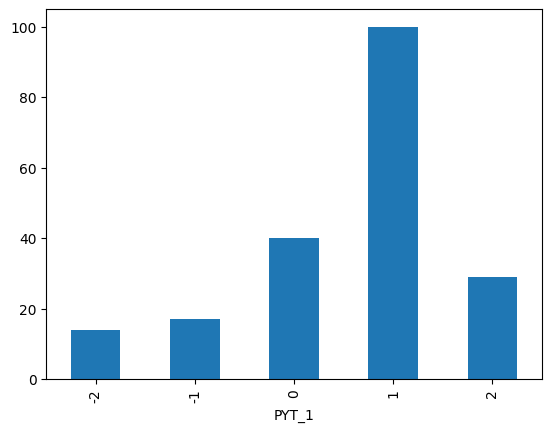

In [17]:
ft = df['PYT_1'].value_counts().sort_index()
ft.plot(kind='bar')

<AxesSubplot: ylabel='count'>

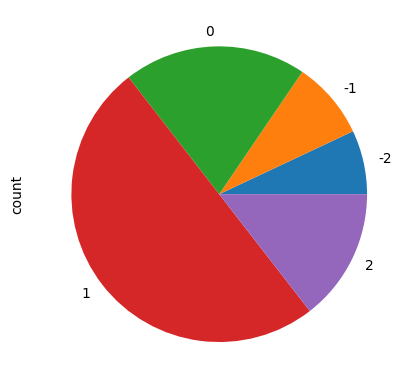

In [18]:
ft.plot(kind='pie')

<AxesSubplot: xlabel='PYT_2'>

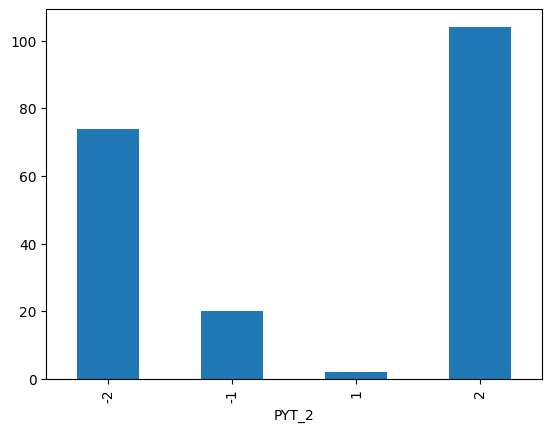

In [19]:
ft = df['PYT_2'].value_counts().sort_index()
ft.plot(kind='bar')

<AxesSubplot: ylabel='count'>

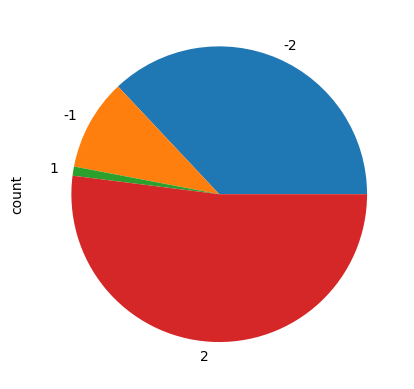

In [20]:
ft.plot(kind='pie')

In [21]:
pd.crosstab(df['PYT_1'], df['DZIAL'])

DZIAL,HR,IT,MK,PD
PYT_1,,,,
-2,2,0,3,9
-1,2,2,3,10
0,5,4,14,17
1,19,15,15,51
2,3,5,10,11


In [22]:
pd.crosstab(df['PYT_1'], df['STAZ'])

STAZ,1,2,3
PYT_1,,,
-2,5,5,4
-1,6,10,1
0,8,26,6
1,19,75,6
2,3,24,2


In [23]:
pd.crosstab(df['PYT_1'], df['CZY_KIER'])

CZY_KIER,Nie,Tak
PYT_1,,
-2,10,4
-1,14,3
0,34,6
1,88,12
2,27,2


In [24]:
pd.crosstab(df['PYT_1'], df['PLEC'])

PLEC,K,M
PYT_1,,
-2,3,11
-1,7,10
0,14,26
1,36,64
2,11,18


In [25]:
pd.crosstab(df['PYT_1'], df['WIEK_KAT'])

WIEK_KAT,<35,36-45,46-55,>55
PYT_1,,,,
-2,1,11,2,0
-1,6,7,1,3
0,3,24,5,8
1,13,50,25,12
2,3,12,12,2


In [26]:
pd.crosstab(df['PYT_2'], df['PYT_3'])

PYT_3,-2,-1,1,2
PYT_2,,,,
-2,49,16,5,4
-1,3,6,10,1
1,0,0,2,0
2,0,8,15,81


In [27]:
labels = ['zdecydowanie się nie zgadzam', 'nie zgadzam się', 'zgadzam się', 'zdecydowanie się zgadzam']  

conditions = [
    (df['PYT_2'] == -2), 
    (df['PYT_2'] == -1),  
    (df['PYT_2'] == 1),   
    (df['PYT_2'] == 2)   
]

df['CZY_ZADOW'] = np.select(conditions, labels, default='Nieokreślone')
df['CZY_ZADOW'] = df['CZY_ZADOW'].astype('category')
print(df['CZY_ZADOW'].cat.categories)
df.info()

Index(['nie zgadzam się', 'zdecydowanie się nie zgadzam',
       'zdecydowanie się zgadzam', 'zgadzam się'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   DZIAL      200 non-null    category
 1   STAZ       200 non-null    category
 2   CZY_KIER   200 non-null    category
 3   PYT_1      200 non-null    int64   
 4   PYT_2      200 non-null    int64   
 5   PYT_3      200 non-null    int64   
 6   PLEC       200 non-null    category
 7   WIEK       200 non-null    int64   
 8   WIEK_KAT   200 non-null    category
 9   CZY_ZADOW  200 non-null    category
dtypes: category(6), int64(4)
memory usage: 8.5 KB


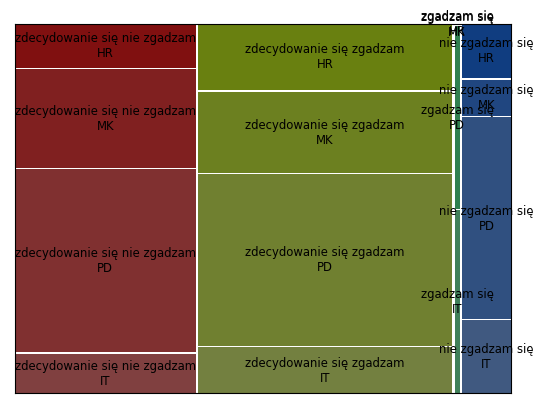

In [28]:
fig = mosaic(df, ['CZY_ZADOW', 'DZIAL'], axes_label=False)[0]
plt.show()

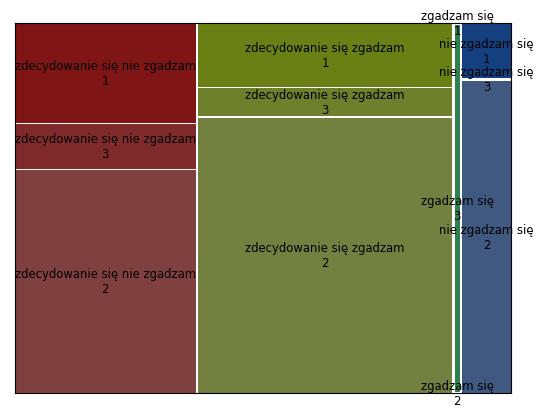

In [29]:
mosaic(df, ['CZY_ZADOW', 'STAZ'], axes_label=False)
plt.show()

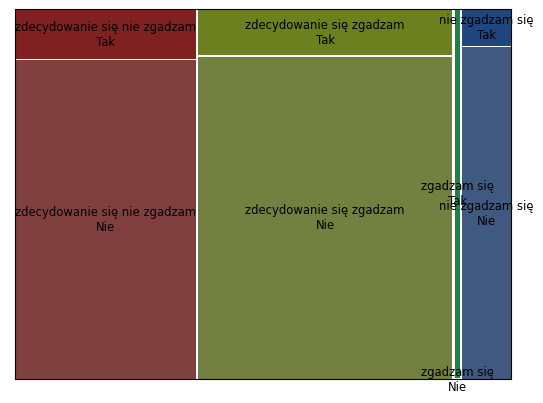

In [30]:
mosaic(df, ['CZY_ZADOW', 'CZY_KIER'], axes_label=False)
plt.show()

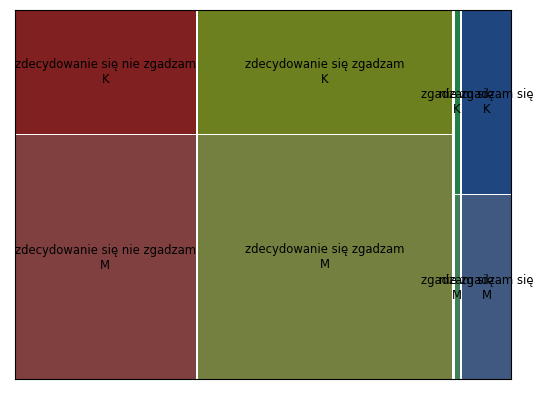

In [31]:
mosaic(df, ['CZY_ZADOW', 'PLEC'], axes_label=False)
plt.show()

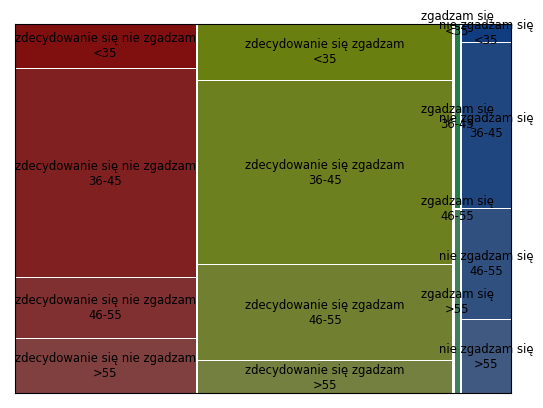

In [32]:
mosaic(df, ['CZY_ZADOW', 'WIEK_KAT'], axes_label=False)
plt.show()

# Część II

### Zadanie 2.

In [33]:
import altair as alt

In [34]:
df1 = df[['PYT_1', 'CZY_KIER']]

labels = {
    -2: "Zdecydowanie się nie zgadzam",
    -1: "Nie zgadzam się",
    0: "Neutralnie",
    1: "Zgadzam się",
    2: "Zdecydowanie się zgadzam"
}
df1['PYT_1_label'] = df1['PYT_1'].map(labels)

overall_chart = (
    alt.Chart(df1)
    .mark_bar()
    .encode(
        x=alt.X('PYT_1_label:O', title='Ocena', sort=list(labels.values())),
        y=alt.Y('count()', title='Liczba odpowiedzi'),
        tooltip=['count()']
    )
    .properties(title='Rozkład odpowiedzi w całej grupie')
)

subgroup_chart = (
    alt.Chart(df1)
    .mark_bar()
    .encode(
        x=alt.X('PYT_1_label:O', title='Ocena', sort=list(labels.values())),
        y=alt.Y('count()', title='Liczba odpowiedzi'),
        color='CZY_KIER:N',
        column=alt.Column('CZY_KIER:N', title='Czy kierownik?'),
        tooltip=['count()']
    )
    .properties(title='Rozkład odpowiedzi w podgrupach')
)

alt.hconcat(overall_chart, subgroup_chart)

alt.HConcatChart(...)

### Zadanie 3.

In [44]:
import numpy as np
import pandas as pd

with_replacement = np.random.choice(df.index, size=int(0.1 * len(df)), replace=True)
sample_with_replacement = df.loc[with_replacement]

duplicates_with = pd.Series(with_replacement).value_counts()
repeated_with = duplicates_with[duplicates_with > 1]

without_replacement = np.random.choice(df.index, size=int(0.1 * len(df)), replace=False)
sample_without_replacement = df.loc[without_replacement]

duplicates_without = pd.Series(without_replacement).value_counts()
repeated_without = duplicates_without[duplicates_without > 1]

display('Ze zwracaniem:', sample_with_replacement)
print('Powtórzenia (ze zwracaniem):', len(repeated_with))

display('Bez zwracania:', sample_without_replacement)
print('Powtórzenia (bez zwracania):', len(repeated_without))


'Ze zwracaniem:'

,DZIAL,STAZ,CZY_KIER,PYT_1,PYT_2,PYT_3,PLEC,WIEK,WIEK_KAT,CZY_ZADOW
16,IT,2,Nie,0,-2,-2,K,45,36-45,zdecydowanie się nie zgadzam
50,PD,1,Nie,-2,-2,-1,M,43,36-45,zdecydowanie się nie zgadzam
153,MK,2,Nie,1,2,2,M,65,>55,zdecydowanie się zgadzam
93,PD,2,Nie,1,2,2,M,45,36-45,zdecydowanie się zgadzam
33,PD,1,Nie,-1,-2,-2,M,25,<35,zdecydowanie się nie zgadzam
68,PD,1,Nie,-1,-2,-1,M,25,<35,zdecydowanie się nie zgadzam
117,PD,2,Tak,1,2,2,M,37,36-45,zdecydowanie się zgadzam
68,PD,1,Nie,-1,-2,-1,M,25,<35,zdecydowanie się nie zgadzam
191,HR,2,Nie,0,-2,-1,M,64,>55,zdecydowanie się nie zgadzam
43,PD,2,Tak,-2,-2,-1,M,40,36-45,zdecydowanie się nie zgadzam


Powtórzenia (ze zwracaniem): 2


'Bez zwracania:'

,DZIAL,STAZ,CZY_KIER,PYT_1,PYT_2,PYT_3,PLEC,WIEK,WIEK_KAT,CZY_ZADOW
108,PD,2,Nie,0,-2,-2,K,43,36-45,zdecydowanie się nie zgadzam
188,HR,2,Nie,1,2,2,M,49,46-55,zdecydowanie się zgadzam
80,PD,2,Nie,1,2,-1,M,44,36-45,zdecydowanie się zgadzam
85,PD,2,Tak,1,2,2,M,52,46-55,zdecydowanie się zgadzam
73,PD,2,Nie,2,2,2,K,44,36-45,zdecydowanie się zgadzam
45,PD,1,Nie,-2,-2,-2,M,40,36-45,zdecydowanie się nie zgadzam
197,HR,2,Nie,-1,-2,-2,K,39,36-45,zdecydowanie się nie zgadzam
29,PD,1,Nie,0,-2,1,M,27,<35,zdecydowanie się nie zgadzam
167,MK,2,Nie,2,2,2,M,38,36-45,zdecydowanie się zgadzam
95,PD,2,Nie,-2,-2,-1,M,36,36-45,zdecydowanie się nie zgadzam


Powtórzenia (bez zwracania): 0


### Zadanie 4.

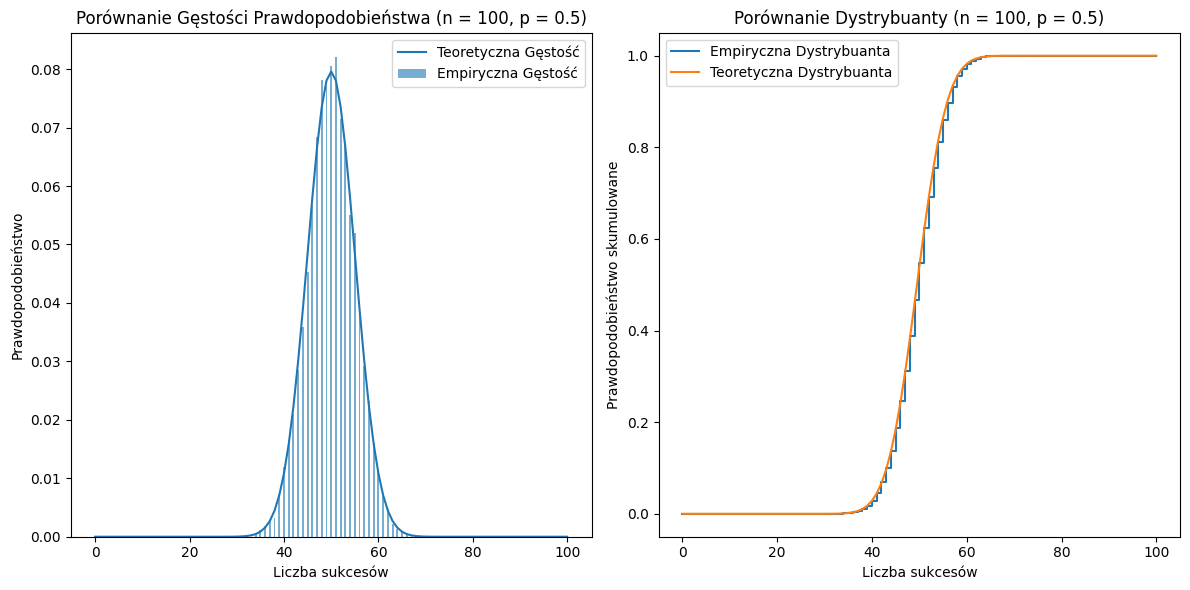

In [ ]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np

def binomial_coeff(n, k):
    return math.comb(n, k)

def binomial_pdf(n, p, k):
    return binomial_coeff(n, k) * (p ** k) * ((1 - p) ** (n - k))

def empirical_pdf(n, p, M):
    successes_count = [0] * (n + 1)
    
    for _ in range(M):
        successes = binomial_trial(n, p)
        successes_count[successes] += 1
    
    return [count / M for count in successes_count]

def binomial_trial(n, p):
    successes = 0
    for _ in range(n):
        if random.random() < p:
            successes += 1
    return successes

def binomial_cdf(n, p, k):
    return sum(binomial_pdf(n, p, i) for i in range(k + 1))

def empirical_cdf(n, p, M):
    successes_count = [0] * (n + 1)
    
    for _ in range(M):
        successes = binomial_trial(n, p)
        successes_count[successes] += 1
    
    cumulative_count = np.cumsum(successes_count)
    return cumulative_count / M

# Parametry
n = 100  # liczba prób
p = 0.5  # prawdopodobieństwo sukcesu
M = 10000  # liczba prób do symulacji


k_values = list(range(n + 1))
theoretical_pdf = [binomial_pdf(n, p, k) for k in k_values]
theoretical_cdf = [binomial_cdf(n, p, k) for k in k_values]

empirical_pdf_values = empirical_pdf(n, p, M)
empirical_cdf_values = empirical_cdf(n, p, M)



plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(k_values, empirical_pdf_values, width=0.4, alpha=0.6, label="Empiryczna Gęstość")
plt.plot(k_values, theoretical_pdf, label="Teoretyczna Gęstość")
plt.xlabel("Liczba sukcesów")
plt.ylabel("Prawdopodobieństwo")
plt.title(f"Porównanie Gęstości Prawdopodobieństwa (n = {n}, p = {p})")
plt.legend()

plt.subplot(1, 2, 2)
plt.step(k_values, empirical_cdf_values, where="post", label="Empiryczna Dystrybuanta")
plt.plot(k_values, theoretical_cdf, label="Teoretyczna Dystrybuanta")
plt.xlabel("Liczba sukcesów")
plt.ylabel("Prawdopodobieństwo skumulowane")
plt.title(f"Porównanie Dystrybuanty (n = {n}, p = {p})")
plt.legend()

plt.tight_layout()
plt.show()


### Zadanie 5.

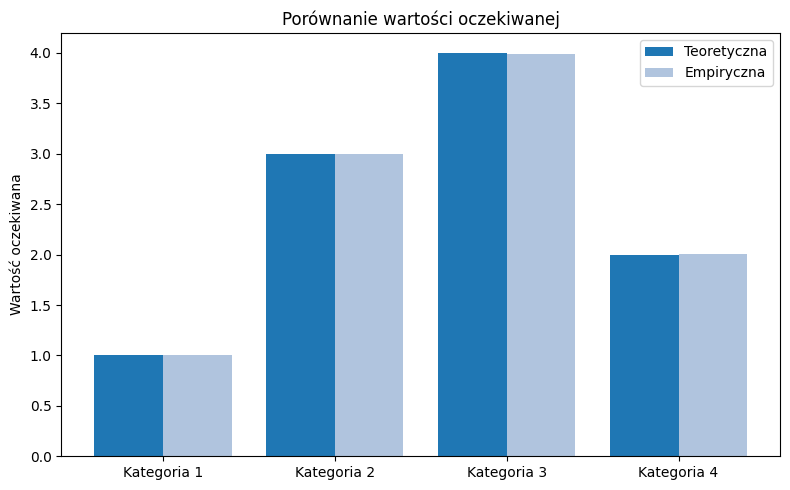

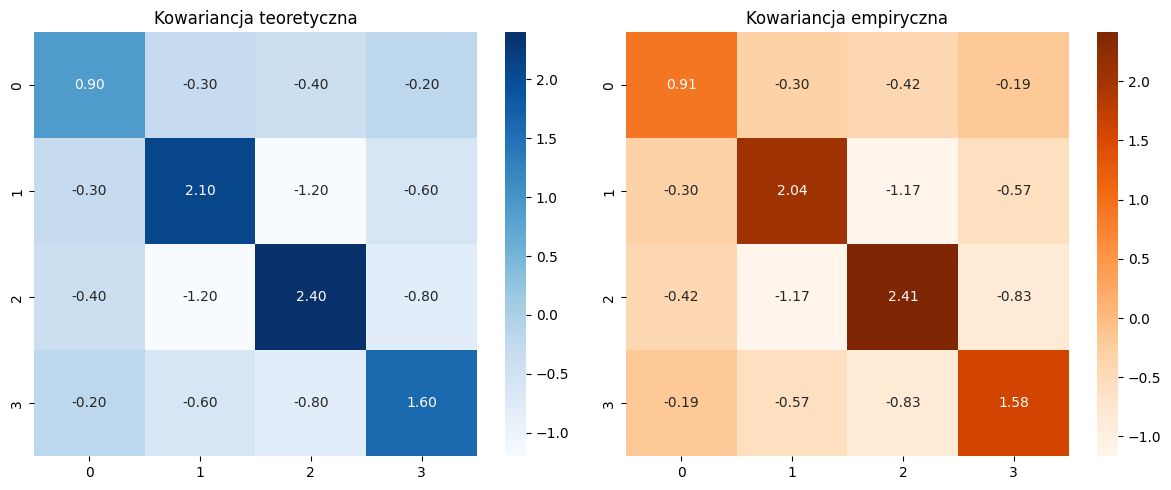

In [ ]:
import numpy as np

def simulate_multinomial_manual(n, p, num_samples):
    """
    Symuluje próbki z rozkładu wielomianowego bez użycia gotowych funkcji.
    
    Parameters:
        n (int): liczba prób w jednym eksperymencie
        p (list): lista prawdopodobieństw dla każdej kategorii (suma = 1)
        num_samples (int): liczba próbek (eksperymentów)
        
    Returns:
        samples (ndarray): macierz wyników (num_samples x len(p))
    """
    categories = len(p)
    p = np.array(p)
    cumulative_p = np.cumsum(p)
    
    samples = np.zeros((num_samples, categories), dtype=int)
    
    for i in range(num_samples):
        count = np.zeros(categories, dtype=int)
        for _ in range(n):
            r = np.random.rand()
            for j in range(categories):
                if r < cumulative_p[j]:
                    count[j] += 1
                    break
        samples[i] = count
        
    return samples

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Parametry
n = 10
p = [0.1, 0.3, 0.4, 0.2]
num_samples = 10000

samples = simulate_multinomial_manual(n, p, num_samples)

mean_theoretical = n * np.array(p)
cov_theoretical = n * (np.diag(p) - np.outer(p, p))
mean_empirical = np.mean(samples, axis=0)
cov_empirical = np.cov(samples, rowvar=False)

categories = [f"Kategoria {i+1}" for i in range(len(p))]
x = np.arange(len(p))

plt.figure(figsize=(8, 5))
plt.bar(x - 0.2, mean_theoretical, width=0.4, label='Teoretyczna')
plt.bar(x + 0.2, mean_empirical, color="lightsteelblue", width=0.4, label='Empiryczna')
plt.xticks(x, categories)
plt.ylabel("Wartość oczekiwana")
plt.title("Porównanie wartości oczekiwanej")
plt.legend()
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cov_theoretical, annot=True, fmt=".2f", cmap="Blues", ax=axes[0])
axes[0].set_title("Kowariancja teoretyczna")

sns.heatmap(cov_empirical, annot=True, fmt=".2f", cmap="Oranges", ax=axes[1])
axes[1].set_title("Kowariancja empiryczna")

plt.tight_layout()
plt.show()


# Część V

### Zadanie 10.

In [ ]:
from scipy.stats import binomtest
from statsmodels.stats.proportion import proportions_ztest

In [ ]:
result = binomtest(3, n=15, p=0.1, alternative='greater')
result.pvalue

0.18406106910639122

In [ ]:
count = np.array([5, 12])
nobs = np.array([83, 99])
stat, pval = proportions_ztest(count, nobs)
print('{0:0.3f}'.format(pval))

0.159


### Zadanie 11.

#### 1. Prwdopodobieństwo, że w firmie pracuje kobieta wynosi 0.5.

In [ ]:
def check_p_value(p_value):
    if p_value < 0.05:
        print('Hipoteza zerowa może zostać odrzucona')
    else:
        print('Hipoteza zerowa nie może zostać odrzucona')

In [ ]:
k = len(df[df['PLEC'] == 'K'])
n = len(df)
p = 0.5
result = binomtest(k, n, p, alternative='two-sided')
p_value = result.pvalue
print(f"p_value = {p_value}")
check_p_value(p_value)

p_value = 4.97297347921355e-05
Hipoteza zerowa może zostać odrzucona


In [ ]:
stat, pval = proportions_ztest(k, n, p, alternative='two-sided')
print(f"p_value = {pval}")
check_p_value(pval)

p_value = 1.8243011136745864e-05
Hipoteza zerowa może zostać odrzucona


#### 2. Prawdopodbieństwo, że pracownik uważa szkolenia za przystosowane do swoich potrzeb w pierwszym badanym okresie jest większe bądź równe 0.7

In [ ]:
k = len(df[(df['PYT_2'] == 1) | (df['PYT_2'] == 2)])
n = len(df)
p = 0.7
result = binomtest(k, n, p, alternative='less')
p_value = result.pvalue
print(f"p_value = {p_value}")
check_p_value(p_value)

p_value = 3.212876740960112e-07
Hipoteza zerowa może zostać odrzucona


In [ ]:
stat, pval = proportions_ztest(k, n, p, alternative='smaller')
print(f"p_value = {pval}")
check_p_value(pval)

p_value = 7.286468776023958e-07
Hipoteza zerowa może zostać odrzucona


#### 3. Prawdopodobieństwo, że kobieta pracuje na stanowisku kierowniczym jest równe prawdopodobieństwu, że mężczyzna pracuje na stanowisku kierowniczym.

In [ ]:
k1 = len(df[(df['CZY_KIER'] == 'Tak') & (df['PLEC'] == 'M')])
n1 = len(df[df['PLEC'] == 'M'])
p = k1/n1
k = len(df[(df['CZY_KIER'] == 'Tak') & (df['PLEC'] == 'K')])
n = len(df[df['PLEC'] == 'K'])
result = binomtest(k, n, p, alternative='two-sided')
p_value = result.pvalue
print(f"p_value = {p_value}")
check_p_value(p_value)

p_value = 0.5040620681066837
Hipoteza zerowa nie może zostać odrzucona


In [ ]:
stat, pval = proportions_ztest(k, n, p, alternative='two-sided')
print(f"p_value = {pval}")
check_p_value(pval)

p_value = 0.35635965611973397
Hipoteza zerowa nie może zostać odrzucona


#### 4. Prawdopodobieństwo, że kobieta uważa szkolenia za przystosowane do swoich potrzeb w pierwszym badanym okresie jest równe prawdopodobieństwu, że mężczyzna uważa szkolenia za przystosowane do swoich potrzeb w pierwszym badanym okresie.

In [ ]:
k1 = len(df[(df['PYT_2'] <= 1) & (df['PLEC'] == 'M')])
n1 = len(df[df['PLEC'] == 'M'])
p = k1/n1
k = len(df[(df['PYT_2'] <= 1) & (df['PLEC'] == 'K')])
n = len(df[df['PLEC'] == 'K'])
result = binomtest(k, n, p, alternative='two-sided')
p_value = result.pvalue
print(f"p_value = {p_value}")
check_p_value(p_value)

p_value = 0.47862248077440184
Hipoteza zerowa nie może zostać odrzucona


In [ ]:
stat, pval = proportions_ztest(k, n, p, alternative='two-sided')
print(f"p_value = {pval}")
check_p_value(pval)

p_value = 0.4798031720910073
Hipoteza zerowa nie może zostać odrzucona


#### 5. Prawdopodobieństwo, że kobieta pracuje w dziale zasobów ludzkich jest większe lub równe prawdopodobieństwu, że mężczyzna pracuje w dziale zasobów ludzkich.

In [ ]:
k1 = len(df[(df['DZIAL'] == 'HR') & (df['PLEC'] == 'M')])
n1 = len(df[df['PLEC'] == 'M'])
p = k1/n1
k = len(df[(df['DZIAL'] == 'HR') & (df['PLEC'] == 'K')])
n = len(df[df['PLEC'] == 'K'])
result = binomtest(k, n, p, alternative='less')
p_value = result.pvalue
print(f"p_value = {p_value}")
check_p_value(p_value)

p_value = 0.0003456683038890572
Hipoteza zerowa może zostać odrzucona


In [ ]:
stat, pval = proportions_ztest(k, n, p, alternative='smaller')
print(f"p_value = {pval}")
check_p_value(pval)

p_value = 1.135483190810861e-08
Hipoteza zerowa może zostać odrzucona


### Zadanie  12.

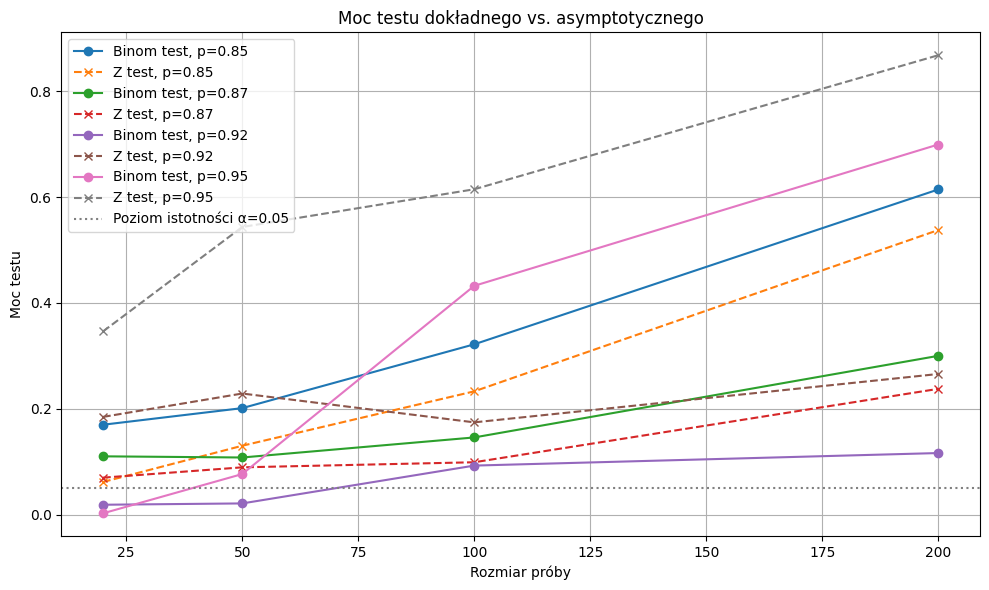

In [ ]:
alpha = 0.05
p_null = 0.9
alternative_ps = [0.85, 0.87, 0.92, 0.95]
sample_sizes = [20, 50, 100, 200]
n_simulations = 10000

results = []

for p_alt in alternative_ps:
    for n in sample_sizes:
        rejections_binom = 0
        rejections_z = 0

        for _ in range(n_simulations):
            sample = np.random.binomial(n, p_alt)

            test_binom = binomtest(sample, n, p=p_null, alternative='two-sided')
            if test_binom.pvalue < alpha:
                rejections_binom += 1

            stat, pval = proportions_ztest(sample, n, value=p_null, alternative='two-sided')
            if pval < alpha:
                rejections_z += 1

        power_binom = rejections_binom / n_simulations
        power_z = rejections_z / n_simulations
        results.append((p_alt, n, power_binom, power_z))

df = pd.DataFrame(results, columns=['p_alt', 'sample_size', 'power_binom', 'power_z'])

fig, ax = plt.subplots(figsize=(10, 6))

for p in alternative_ps:
    subset = df[df['p_alt'] == p]
    ax.plot(subset['sample_size'], subset['power_binom'], marker='o', label=f'Binom test, p={p}')
    ax.plot(subset['sample_size'], subset['power_z'], marker='x', linestyle='--', label=f'Z test, p={p}')

ax.set_title('Moc testu dokładnego vs. asymptotycznego')
ax.set_xlabel('Rozmiar próby')
ax.set_ylabel('Moc testu')
ax.axhline(0.05, color='gray', linestyle=':', label='Poziom istotności α=0.05')
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()

##### Wnioski

1. Moc testu rośnie wraz z rozmiarem próby
Zarówno dla testów dokładnych, jak i asymptotycznych, im większy rozmiar próby, tym większa moc testu.
Szczególnie widoczne dla wartości p=0.95, gdzie moc testu Z i testu dokładnego wzrasta do ponad 0.6 i 0.9.

2. Test Z zazwyczaj ma większą moc dla większych wartości p (np. p=0.95)
Dla p=0.95, Z test znacznie szybciej osiąga wysoką moc niż Binom test.
Sugeruje to, że test Z może być bardziej czuły przy większych efektach (większe różnice od hipotezy zerowej).

3. Test dokładny (Binom) może być bardziej konserwatywny dla małych p
Dla p=0.85 i p=0.87 test Binom ma większą moc niż test Z.
Szczególnie dla małych prób (np. 25, 50), test Binom wypada lepiej lub porównywalnie.

4. Dla niskich wartości p i małych prób test Z może mieć zawyżoną moc
Widać, że test Z dla p=0.92 przy próbie 25 ma relatywnie wysoką moc (~0.2), a potem maleje.
Może to wskazywać na niestabilność oszacowania mocy przy małych próbach – test Z nie jest zalecany dla bardzo małych próbek.

5. Linia przerywana – poziom istotności (α=0.05)
Przypomina, że moc testu powinna być znacznie większa niż poziom istotności, aby test był użyteczny.
Gdy linie znajdują się poniżej tej wartości, oznacza to praktycznie brak mocy (duża szansa na błąd II rodzaju – nie wykrycie efektu, który istnieje).